In [1]:
from PuzzleSolver import PuzzleSolver
import cv2
import numpy as np

In [2]:
ps = PuzzleSolver()
img = cv2.imread('img/pawel1.jpg')
splited = ps.split_puzzles_from_image(img)

In [3]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        return None

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return y, x

False False False False



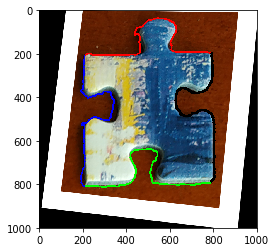

False False False False



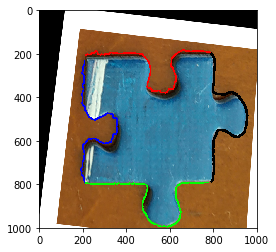

False False False False



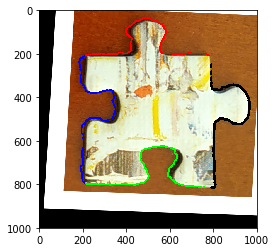

False False False False



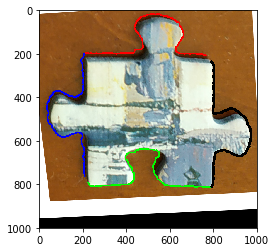

False False False False



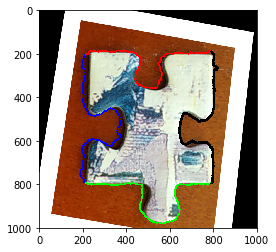

False False False False



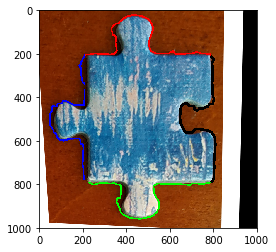

False False False False



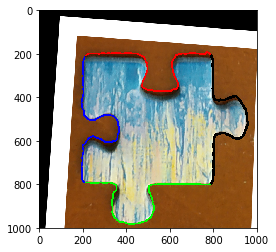

False False False False



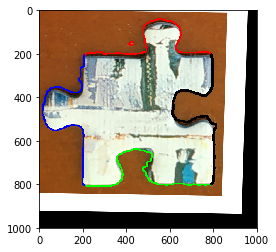

False False False False



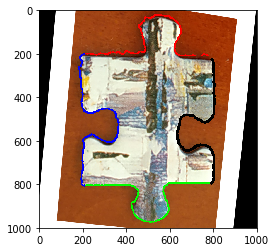

False False False False



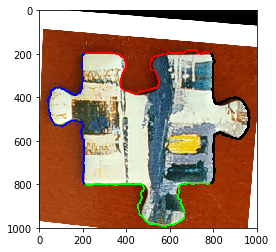

False False False False



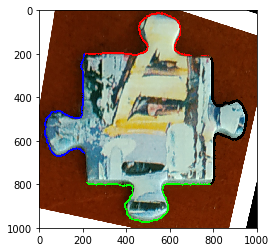

False False False False



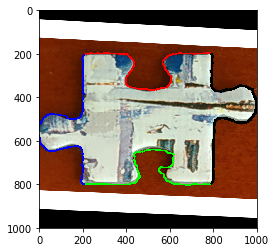

False False False False



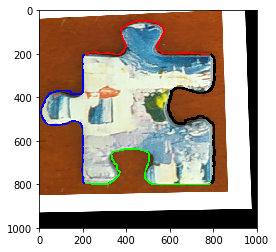

False False False False



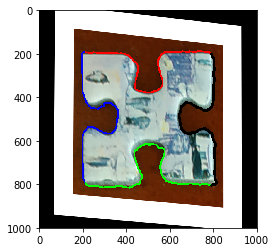

False False False False



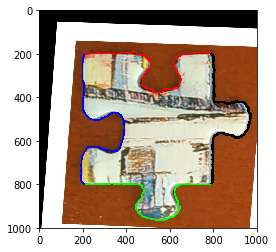

False False False False



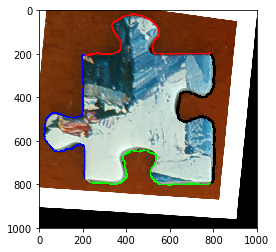

False False False False



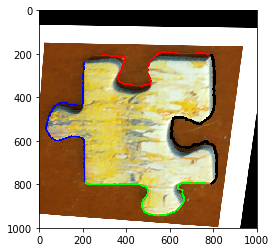

False False False False



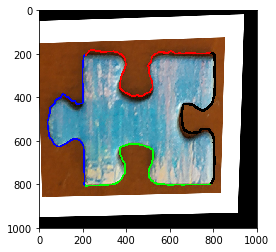

In [4]:
def check_tits(border_image, i, where):
    if where=='up':
        if border_image[i,500] == 255 or border_image[i,450] == 255 or border_image[i,550] == 255:
            if i < 190 or i > 210:
                return True
    elif where=='down':
        if border_image[i,500] == 255 or border_image[i,450] == 255 or border_image[i,550] == 255:
            if i < 790 or i > 810:
                return True
    elif where=='left':
        if border_image[500,i] == 255 or border_image[450,i] == 255 or border_image[550,i] == 255:
            if i < 190 or i > 210:
                return True
    elif where=='right':
        if border_image[500,i] == 255 or border_image[450,i] == 255 or border_image[550,i] == 255:
            if i < 790 or i > 810:
                return True
    return False
            
def get_upper(border_image):    
    up_points = []
    up = None
    for i in range(500,0,-1):
        if check_tits(border_image, i, 'up'):
            up = (i,500)
            break
            
    if up[0] > 210:
        for i in range(300,700,1):
            for j in range(180,up[0]+15,1):
                if border_image[j,i]==255:
                    up_points.append((j,i))                    
    elif up[0] < 190:
        for i in range(300,700,1):
            for j in range(0,210,1):
                if border_image[j,i]==255:
                    up_points.append((j,i)) 

    for i in range(180,820,1):
        for j in range(180,210,1):
            if border_image[j,i]==255:
                up_points.append((j,i))
            
    return up_points, np.std(np.array(up_points)[:,0]) < 5.0

def get_downer(border_image):    
    down_points = []
    down = None
    for i in range(500,1000,1):
        if check_tits(border_image, i, 'down'):
            down = (i,500)
            break
            
    if down[0] < 790:
        for i in range(300,700,1):
            for j in range(down[0]-15,820,1):
                if border_image[j,i]==255:
                    down_points.append((j,i)) 
                    
    elif down[0] > 810:
        for i in range(300,700,1):
            for j in range(790,1000,1):
                if border_image[j,i]==255:
                    down_points.append((j,i)) 

    for i in range(180,820,1):
        for j in range(790,820,1):
            if border_image[j,i]==255:
                down_points.append((j,i))
            
    return down_points, np.std(np.array(down_points)[:,0]) < 5.0
    
def get_lefter(border_image):    
    left_points = []
    left = None
    for i in range(500,0,-1):
        if check_tits(border_image, i, 'left'):
            left = (500,i)
            break
            
    if left[1] > 210:
        for i in range(300,700,1):
            for j in range(180,left[1]+15,1):
                if border_image[i,j]==255:
                    left_points.append((i,j))                    
    elif left[1] < 190:
        for i in range(300,700,1):
            for j in range(0,210,1):
                if border_image[i,j]==255:
                    left_points.append((i,j)) 

    for i in range(180,820,1):
        for j in range(180,210,1):
            if border_image[i,j]==255:
                left_points.append((i,j))
            
    return left_points, np.std(np.array(left_points)[:,1]) < 5.0

def get_righter(border_image):    
    right_points = []
    right = None
    for i in range(500,1000,1):
        if check_tits(border_image, i, 'right'):
            right = (500,i)
            break
            
    if right[1] < 790:
        for i in range(300,700,1):
            for j in range(right[1]-15,820,1):
                if border_image[i,j]==255:
                    right_points.append((i,j)) 
    elif right[1] > 810:
        for i in range(300,700,1):
            for j in range(790,1000,1):
                if border_image[i,j]==255:
                    right_points.append((i,j)) 

    for i in range(180,820,1):
        for j in range(790,820,1):
            if border_image[i,j]==255:
                right_points.append((i,j))
            
    return right_points, np.std(np.array(right_points)[:,1]) < 5.0

for split in splited:
    im = ps.get_transform_image(split)
    
    up, upT = get_upper(im[1])
    down, downT = get_downer(im[1])
    left, leftT = get_lefter(im[1])
    right, rightT = get_righter(im[1])

    print('{} {} {} {}\n'.format(upT, downT, leftT, rightT))
    for el in up:
        cv2.circle(im[0], (el[1],el[0]), 2, (0,0,255), -1)
    for el in down:
        cv2.circle(im[0], (el[1],el[0]), 2, (0,255,0), -1)
    for el in left:
        cv2.circle(im[0], (el[1],el[0]), 2, (255,0,0), -1)
    for el in right:
        cv2.circle(im[0], (el[1],el[0]), 4, (0,0,0), -1)

    ps.draw(im[0])